---
# Part I: Research Question

 
My research question for this data analysis project is as follows: does a correlation exist between tCO2 (total carbon dioxide) ppm and energy consumption kWh, and if so, is the correlation statistically significant?  

The study will utilize common data exploration techniques coupled with linear regression modeling to determine whether a statistically significant relationship exists between tCO2 emissions and energy consumption in a steel manufacturing environment.  With many governments shifting to more environmentally friendly policies, greater emphasis is being placed on the reduction of CO2 emissions.  Understanding causal relationships that lead to increased production of CO2 emissions will be of benefit to businesses impacted by these regulations.

* Null Hypothesis: No statistically significant correlation exists between tCO2 ppm and energy consumption kWh.
* Alternate Hypothesis: A correlation exists between tCO2 ppm and energy consumption kWh and it is statistically significant (P ≤ 0.05, R-squared > .90).

---
# Part II: Data Collection


Data for the study will include a data set containing tCO2 measurements along with energy consumption kWh measurements taken over time.  The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates.  The data set is comprised of 35040 rows across 11 variables (Dua and Graff, 2021).  The data is provided courtesy of the UCI Machine Learning Repository.  It has been widely used by students, educators, and researchers all over the world as a primary source of machine learning data sets and is free to use for these purposes (with citation).

The sources for the data contained within the data set are described as follows:

“The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.” (Dua and Graff, 2021).

https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset#

|Variable   | Type  |
|---|---|
| date  | Categorical  |
| Usage_kWh  | Continuous  |
| Lagging_Current_Reactive.Power_kVarh  | Continuous  |
| Leading_Current_Reactive_Power_kVarh  | Continuous  |
| CO2(tCO2)  |  Continuous |
| Lagging_Current_Power_Factor  |  Continuous |
| Leading_Current_Power_Factor  |  Continuous |
| NSM  | Continuous  |
| WeekStatus  |  Categorical |
| Day_of_week  | Categorical  |
| Load_Type  |  Categorical |

Speed and availability are distinct advantages of utilizing data that is freely available to the public for download.  A disadvantage is having to rely on others to vouch for the data's security, accuracy, and reliability.  For this reason, it is always recommended that data be downloaded only from reputable sources.  As the UCI Machine Learning Repository is a well-respected resource in the data science community, no challenges were encountered in this phase of the project and I was able to quickly and easily download the data set.

---
# Part III: Data Extraction and Preparation


Python 3, used within Jupyter Lab will be utilized for data import and cleaning.  I used Python as my selected programming language due to prior familiarity and broader applications when considering programming in general.  R is a very strong and robust language tool for data analysis and statistics but finds itself somewhat limited to that niche role (Insights for Professionals, 2019).  

Python's familiarity, flexibility, and wide array of open-source packages are a definite advantage when considering data preparation and data analysis tasks.  Chances are that if there's a data analysis task, there's a Python package built for that specific purpose.  There are disadvantages as well, though.  One such disadvantage is that by limiting the language in use to Python, I will not have access to more potentially powerful tools utilized by other languages in the data science family: R, SAS, SPSS, and MATLAB to name a few.

During the data extraction and preparation stage the data will be checked for duplicated rows and null or missing values, with treatments being applied as needed when an issue is encountered.  Columns irrelevant to the research question will be removed and data types will be mutated as necessary.

The code example below shows the Python packages imported for this exercise.

In [1]:
# Imports and housekeeping
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_theme(style="darkgrid")

I utilized the NumPy and Pandas libraries to perform some of my data analysis tasks, as they are among the most popular Python libraries employed for this purpose and see widespread use.  Seaborn is included primarily for some nicer-looking visualizations, seen later in this document (Parra, 2021).

Beyond these libraries, I relied upon the Statsmodels library; in particular its main API and formula API.  Statsmodels is one of several Python libraries that support linear regression.  I am familiar with Statsmodels due to previous experience with it and find it suitable for this project because it "includes a number of convenience classes and functions to help with tasks related to statistical analysis" (Seabold and Perktold, 2010).

In [2]:
# Import the main dataset
df = pd.read_csv('Steel_industry_data.csv',dtype={'locationid':np.int64})

In [3]:
# Display the data frame
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [4]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [5]:
# Check data for duplicated rows
df.duplicated().sum()

0

In [6]:
# Check the columns for null values
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [7]:
# Rename columns with problematic punctuation
df.rename(columns={"Lagging_Current_Reactive.Power_kVarh": "Lagging_Current_Reactive_Power_kVarh", "CO2(tCO2)": "CO2_tCO2"}, inplace = True)

In [8]:
# Remove columns not relevant to objective from data frame
df = df.drop(['date', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 
              'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 
              'WeekStatus', 'Day_of_week', 'Load_Type'], axis = 1)

In [9]:
# Display the data frame (first 5 rows)
df.head()

,Usage_kWh,CO2_tCO2
0,3.17,0.0
1,4.00,0.0
2,3.24,0.0
3,3.31,0.0
4,3.82,0.0


---
# Part IV: Analysis

 
The data analysis process will be comprised of these steps:

1. A correlation matrix will be generated to determine the degree to which features of the data set might be related.  
2. A linear regression model will be fitted and evaluated for further statistical corroboration of correlation.  
3. The resulting model will also be evaluated for MSE, RSE, and R-Squared metrics.

A correlation matrix can easily and quickly identify whether a linear relationship exists between two variables by revealing the correlation coefficient.  The correlation coefficient can fall between -1 and 1, with stronger relationships indicated by values closer to either extreme (Zaric, 2019).  Likewise, linear regression is useful for predicting a value (Y) based on a single predictor variable (X), which is another way of measuring the correlation between two features (Jidge, 2020).

An advantage of the smaller scope of tools and metrics used in this analysis is that the quantitative results will reveal whether the null hypothesis can be accepted or rejected while the volume of code required is minimized.  A consequence of limiting that scope is that I will not approach the full potential that the data may yield.  While the results will satisfy the requirement of the research question and its limited context when it comes to more advanced insights that may be discovered I will be leaving a lot on the table.

In [10]:
# Display a correlation matrix comprised of the two remaining features
df.corr()

,Usage_kWh,CO2_tCO2
Usage_kWh,1.00000,0.98818
CO2_tCO2,0.98818,1.00000


The correlation matrix reveals a strong correlation between the two variables.  I can plot a visualization of that correlation via a regression plot.

<Axes: xlabel='CO2_tCO2', ylabel='Usage_kWh'>

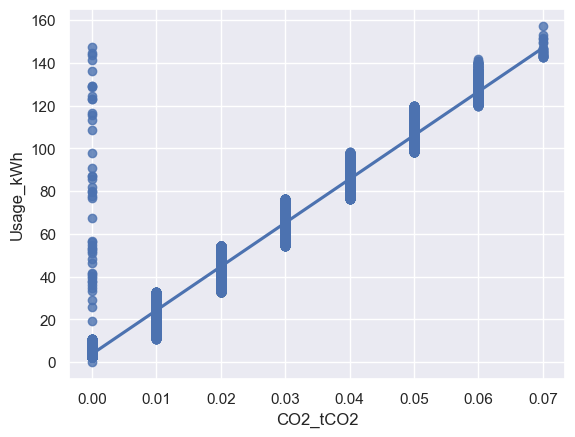

In [11]:
sns.regplot(x="CO2_tCO2",
            y="Usage_kWh",
            data=df,
            ci=None)

Creating the linear regression model is a simple matter of utilizing the ols() function from the Statsmodels library and fitting it to my data.  The resulting metrics are displayed by printing the output of the summary() function when called on the model.

In [12]:
# Create model and display summary
mdl_Usage_kWh_vs_CO2_tCO2 = ols("Usage_kWh ~ CO2_tCO2", data=df).fit()
print(mdl_Usage_kWh_vs_CO2_tCO2.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.456e+06
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        16:06:10   Log-Likelihood:            -1.0699e+05
No. Observations:               35040   AIC:                         2.140e+05
Df Residuals:                   35038   BIC:                         2.140e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8051      0.034    113.086      0.0

Lastly, for more details, I can view the MSE and RSE of the model.  These will provide additional information on the model's performance.

In [13]:
# Display MSE, RSE, Rsquared and Adjusted Rsquared for model
mse_all = mdl_Usage_kWh_vs_CO2_tCO2.mse_resid
print('MSE of model: ', mse_all)
rse_all = np.sqrt(mse_all)
print('RSE of model: ', rse_all)
print('Rsquared of model: ', mdl_Usage_kWh_vs_CO2_tCO2.rsquared)
print('Rsquared Adjusted of model: ', mdl_Usage_kWh_vs_CO2_tCO2.rsquared_adj)

MSE of model:  26.286950187221958
RSE of model:  5.127080083948559
Rsquared of model:  0.9764992611554846
Rsquared Adjusted of model:  0.9764985904340152


---
# Part V: Data Summary and Implications

 
The results of the linear regression model indicate a p-value of 0.00.  Typically a p-value greater than 0.05 is required to negate the statistical significance of the variable pair's relationship.  Therefore a p-value as low as 0.00 indicates a very strong and statistically significant relationship between tCO2 and usage kWh.

The evidence is further supported by the r-squared results of the model analysis, indicating a high accuracy score of 0.976 and hinting at the significant predictive power potential of the model.

These two measurements alone serve to disprove the null hypothesis, and the alternate hypothesis is accepted.  This means that according to the available data a significant relationship exists between tCO2 and usage kWh.  RSE and MSE were utilized as additional measures, with results of ~5.13 and ~26.29 respectively.  These metrics by nature can never be negative and may range from 0 to infinity, with values closer to 0 indicating greater accuracy.  That said, the values returned by the model serve as additional confirmation of the close relationship between the two features.

The key limitation of my analysis is that it is only considering data collected from one manufacturing plant location.  While there is a likelihood of many other similar locations existing, the conclusiveness of the analysis results can be easily questioned until the study can be repeated using a larger collection of data spanning plants run by multiple different companies and in varied geographical locations.

Within the context of this specific research question, however, a recommendation can be made to businesses in the manufacturing sector wishing to minimize cO2 emissions that they monitor their energy consumption and make efforts to mitigate against large energy consumption spikes occurring over short periods.

My research revealed some additional approaches for future study of this data set, two of which I can elaborate on now.  With the simple regression model showing significant strength, a logical next step would be to split the data into two parts, using the first part to build the predictive model and then testing the model on the remaining portion of the data to determine more conclusively how accurate its predictions are.  This is commonly referred to as creating a "train" and "test" split of the data.  This research approach adheres to the use of the two specific features of the data set used in my analysis above.

The second potential approach would be to expand the analysis to include all of the variables in the data set.  If I review a correlation matrix and include only those variables that are currently continuous, there are already additional variable pairs that indicate strong relationships which may also be useful in predictive modeling (code and output for the matrix is shown below).  Expanding the model to include additional variables may result in a multiple linear regression model with greater predictive accuracy.  Principal component analysis might also be a direction worth pursuing to reduce the dimensionality of the data and enable additional classification analysis to take place.

In [14]:
# Re-import the main data set
df = pd.read_csv('Steel_industry_data.csv',dtype={'locationid':np.int64})
# Display a correlation matrix comprised of all continuous variables
df.corr(numeric_only = True)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


---
# References

Dua, D. and Graff, C. (2021, March 30). Steel Industry Energy Consumption Dataset Data Set. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset#

Jidge, A. (2020, May 24). The Complete Guide to Linear Regression Analysis. Towards Data Science. https://towardsdatascience.com/the-complete-guide-to-linear-regression-analysis-38a421a89dc2

Zaric, D. (2019, April 15). Better Heatmaps and Correlation Matrix Plots in Python. Towards Data Science. https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

Insights for Professionals. (2019, February 26). 5 Niche Programming Languages (And Why They're Underrated). https://www.insightsforprofessionals.com/it/software/niche-programming-languages

Parra, H. (2021, April 20). The Data Science Trilogy. Towards Data Science. https://towardsdatascience.com/the-data-science-trilogy-numpy-pandas-and-matplotlib-basics-42192b89e26

Seabold, S., Perktold, J. (2010, June 28). *Statsmodels: Econometric and Statistical Modeling with Python*. Proceedings of the 9th Python in Science Conference (SciPy 2010). https://conference.scipy.org/proceedings/scipy2010/pdfs/seabold.pdf
